In [1]:
import numpy as np
import xarray as xr
import netCDF4
import os
import datetime
import matplotlib.pyplot as plt 
from matplotlib import cm
import shutil
from datetime import datetime, timedelta
import glob
import datetime as dt
from os import path
import os
import cartopy.crs as ccrs
import fsspec
import git 
import json
import sys
import yaml
import requests
import cdsapi
from datetime import timezone
from functions_verification import *
from functions_rf import *
import math 

Using TensorFlow backend.


Date: August 2023

Author: Martin Wegmann

Contact: martinwegmann@pm.me


This notebook will download the ERA5 and ERA5-land data in hourly resolution for the location of the LéXPLORE platform. Since both products are gridded, it will extract the information from the closest grid. For further information about the data see: https://cds.climate.copernicus.eu/#!/home

This notebook will also download water temperature data in three hourly resolution from the MeteoLakes model for Lake Geneva for the location of the LéXPLORE platform. Since this product gridded, it will extract the information from the closest grid. For more information about the data see: http://meteolakes.ch/#!/data

In [2]:
# change yaml location here
with open(r"/Volumes/lexplore_hd/scripts/folder_gap_filling.yaml", "r") as f:
    directories = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
# change yaml location here
with open(r"/Volumes/lexplore_hd/scripts/boundary_conditions_gap_filling.yaml", "r") as f:
    conditions = yaml.load(f, Loader=yaml.FullLoader)

In [5]:
startyear=2020
today= datetime.today()
endyear=2023

focus_start=conditions["focus_period_start"]
focus_end=conditions["focus_period_end"]

### folder structure

In [6]:
for d in directories.values():
    if not os.path.exists(d):
        os.makedirs(d)

16:03:42.283544   Creating directories


In [7]:
# defining folders
output_folder=directories["data_output_folder"]

tchain_folder = directories["tchain_folder"]

thetis_folder = directories["thetis_folder"]

meteo_folder = directories["meteo_folder"]

idronaut_folder = directories["idronaut_folder"]

scripts_folder=directories["scripts_folder"]

era5_folder=directories["era5_folder"]

era5_land_folder=directories["era5_land_folder"]

In [8]:
thetis_folder_data=thetis_folder+"data/Level2/"
meteo_folder_data=meteo_folder+"data/Level1/"
tchain_folder_data=tchain_folder+"data/Level1/"
idronaut_folder_data=idronaut_folder+"data/Level2/"

## get era5 and era5 land hourly data

In [9]:
era_variables=['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature','surface_pressure','surface_solar_radiation_downwards','total_precipitation']

In [10]:
era_area=[48, 5, 45,8,] # maxlat,minlon,minlat,maxlon

In [11]:
era5_land_data=get_era5_land_hourly_lexplore(startyear=startyear,area=era_area,variables=era_variables,wd=era5_land_folder)

the following years are included:
['2020', '2021', '2022', '2023']
Most recent month is not January


2023-08-10 16:03:42,570 INFO Welcome to the CDS
2023-08-10 16:03:42,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-08-10 16:03:42,830 INFO Request is completed
2023-08-10 16:03:42,831 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/adaptor.mars.internal-1691657461.0751097-30626-17-5067fb8a-2571-477f-8b6d-99d0b8122b76.nc to /Volumes/lexplore_hd/era5land/g2s/era5_land_lexplore_202301_10m_u_component_of_wind.nc (1.4M)
2023-08-10 16:03:43,465 INFO Download rate 2.2M/s                                                                                                                                                                                              
2023-08-10 16:03:43,562 INFO Welcome to the CDS
2023-08-10 16:03:43,563 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-08-10 16:03:43,712 INFO Downloading https://download-0009-cl

2023-08-10 16:03:57,199 INFO Download rate 1.1M/s                                                                                                                                                                                              
2023-08-10 16:03:57,306 INFO Welcome to the CDS
2023-08-10 16:03:57,308 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-08-10 16:03:57,478 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data8/adaptor.mars.internal-1691658958.3722377-9675-6-e113b6de-a0dc-4b7b-82ae-233fbb32a61f.nc to /Volumes/lexplore_hd/era5land/g2s/era5_land_lexplore_202303_10m_u_component_of_wind.nc (1.4M)
2023-08-10 16:03:58,117 INFO Download rate 2.1M/s                                                                                                                                                                                              
2023-08-10 16:03:58,211 INFO Welcome to the C

2023-08-10 16:04:11,164 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data4/adaptor.mars.internal-1691660405.0174217-23969-3-fbc400e0-8ea7-452f-81a1-f8329a3e6d45.nc to /Volumes/lexplore_hd/era5land/g2s/era5_land_lexplore_202304_total_precipitation.nc (1.3M)
2023-08-10 16:04:11,636 INFO Download rate 2.8M/s                                                                                                                                                                                              
2023-08-10 16:04:11,745 INFO Welcome to the CDS
2023-08-10 16:04:11,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-08-10 16:04:11,936 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data4/adaptor.mars.internal-1691660523.5305645-20686-2-12a8c6e8-0df7-4a33-889d-842ad52ba66f.nc to /Volumes/lexplore_hd/era5land/g2s/era5_land_lexplore_202305_10m_u_component_of_w

2023-08-10 16:04:37,410 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data8/adaptor.mars.internal-1691662913.648606-22911-16-c0ddf0c2-bfa6-4520-84d5-cef315014ffd.nc to /Volumes/lexplore_hd/era5land/g2s/era5_land_lexplore_newest_data_surface_solar_radiation_downwards.nc (136.8K)
2023-08-10 16:04:37,667 INFO Download rate 533.9K/s                                                                                                                                                                                            
2023-08-10 16:04:37,762 INFO Welcome to the CDS
2023-08-10 16:04:37,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-08-10 16:04:37,908 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data7/adaptor.mars.internal-1691662928.2725427-305-14-9f38c47a-47a2-46a5-ac47-dd83004bf512.nc to /Volumes/lexplore_hd/era5land/g2s/era5_land_lexplore_newest_

In [12]:
era5_data=get_era5_hourly_lexplore(startyear=startyear,area=era_area,variables=era_variables,wd=era5_folder)

2023-08-10 16:04:53,923 INFO Welcome to the CDS
2023-08-10 16:04:53,923 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-08-10 16:04:54,066 INFO Request is completed
2023-08-10 16:04:54,067 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data7/adaptor.mars.internal-1691665220.1666658-2957-9-8aa4950a-a959-41ef-a8da-d9211bbc9025.nc to /Volumes/lexplore_hd/era5/g2s/era5_lexplore_2023.nc (19.7M)
2023-08-10 16:04:59,515 INFO Download rate 3.6M/s                                                                                                                                                                                              
2023-08-10 16:04:59,673 INFO Welcome to the CDS
2023-08-10 16:04:59,674 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-08-10 16:04:59,834 INFO Downloading https://download-0012-clone.copernicus-climate.e

## get meteolakes 

In [13]:
meteolakes,nc_location=get_historical_meteolakes_lexplore(startyear=startyear,endyear=endyear,output_folder=output_folder)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [400]>
Data is missing for this month
<Response [400]>
Data is missing for this month


/Users/mwegmann/functions_rf.py:1483: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.sum(meteolakes_df.iloc[1,:].values=="NaN")>0:


<Response [200]>
<Response [200]>
Data written to /Volumes/lexplore_hd/g2s_input/540996_150144_geneva_temperature_1685588400000_1688169600000.csv
Data written to /Volumes/lexplore_hd/g2s_input/540996_150144_geneva_temperature_1685588400000_1688169600000.nc


## Postprocess Data

### era5 and era5 land

In [14]:
# lat lon location of the platform
lon_platform=6.67
lat_platform=46.5

In [15]:
era5_data_lexplore=era5_data.sel(time=slice(focus_start,focus_end)).sel(longitude=lon_platform,latitude=lat_platform,method="nearest")

In [16]:
era5_data_lexplore

<xarray.Dataset>
Dimensions:    (time: 26280)
Coordinates:
    longitude  float32 6.75
    latitude   float32 46.5
  * time       (time) datetime64[ns] 2020-06-01 ... 2023-05-31T23:00:00
Data variables:
    u10        (time) float32 dask.array<chunksize=(5136,), meta=np.ndarray>
    v10        (time) float32 dask.array<chunksize=(5136,), meta=np.ndarray>
    t2m        (time) float32 dask.array<chunksize=(5136,), meta=np.ndarray>
    sp         (time) float32 dask.array<chunksize=(5136,), meta=np.ndarray>
    ssrd       (time) float32 dask.array<chunksize=(5136,), meta=np.ndarray>
    tp         (time) float32 dask.array<chunksize=(5136,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-05 18:55:56 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [17]:
era5_land_data_lexplore=era5_land_data.sel(time=slice(focus_start,focus_end)).sel(longitude=lon_platform,latitude=lat_platform,method="nearest")

In [18]:
era5_land_data_lexplore

<xarray.Dataset>
Dimensions:    (time: 26280)
Coordinates:
    longitude  float32 6.7
    latitude   float32 46.5
  * time       (time) datetime64[ns] 2020-06-01 ... 2023-05-31T23:00:00
Data variables:
    sp         (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    ssrd       (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    t2m        (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    tp         (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    u10        (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    v10        (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-13 10:24:45 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [19]:
era5_land_data_lexplore.to_netcdf(output_folder+"era5_land_lexplore_g2s.nc")

In [20]:
era5_data_lexplore.to_netcdf(output_folder+"era5_lexplore_g2s.nc")

### meteolakes

In [21]:
meteolakes=meteolakes.sel(time=slice(focus_start,focus_end))

In [23]:
meteolakes

<xarray.DataArray (time: 8760, depth: 59)>
array([[   nan,    nan,    nan, ..., 14.602, 14.599, 14.597],
       [   nan,    nan,    nan, ..., 14.675, 14.673, 14.671],
       [   nan,    nan,    nan, ..., 14.645, 14.645, 14.644],
       ...,
       [   nan,    nan,    nan, ..., 13.294, 13.302, 13.306],
       [   nan,    nan,    nan, ..., 13.371, 13.377, 13.379],
       [   nan,    nan,    nan, ..., 13.332, 13.335, 13.336]])
Coordinates:
  * depth    (depth) float64 -307.0 -292.4 -277.8 -263.2 ... -2.9 -1.9 -1.1 -0.6
  * time     (time) datetime64[ns] 2020-06-01 ... 2023-05-31T21:00:00
Attributes:
    description:  Water Temperature
    units:        degC

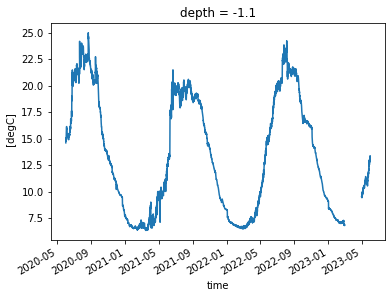

In [24]:
meteolakes.sel(depth=-1.1).plot()

In [22]:
meteolakes.to_netcdf(output_folder+"meteolakes_g2s.nc")